In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import regex

plt.style.use('../netflix.mplstyle')
palette = {'primary': '#221f1f', 'secondary': '#b20710', 'accent': '#e50914', 'tertiary': '#f5f5f1'}

savefigs = False

In [43]:
pattern = regex.compile(r'[\p{L}]+')

In [44]:
reviews = pd.read_csv('../data/reviews_clean.csv', index_col='review_id')
reviews

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,show_id,total,helpful,unhelpful
review_id,,,,,,,,,,,
5704482,raeldor-96879,After Life,9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...",2641,1,1,0
5704512,lizadeegan,After Life,10.0,A work of pure genius,3 May 2020,0,I love everything about this show. I thought t...,2641,3,3,0
5704521,NinnaMali97,After Life,9.0,Authentic,3 May 2020,0,Simple and relatable with the right amount of ...,2641,1,1,0
5704579,dimitardimitrov-47886,After Life,10.0,Brilliant,3 May 2020,0,Absolutely fantastic-really lovely.\nLove it\n...,2641,3,3,0
5704588,josh-29279,After Life,10.0,Awesome production,3 May 2020,0,"The best viewing I've had in long time, so wel...",2641,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
96659,erwan_ticheler,Bonnie and Clyde,8.0,Interesting but not a true classic,19 June 2004,1,SPOILERS!:Although Arthur Penn shows some huge...,6359,2,0,2
96660,shepardjessica,Bonnie and Clyde,10.0,Simply the Best!,17 July 2004,0,I saw this on it's release in '67 and from the...,6359,3,0,3
96661,jamesnightshade,Bonnie and Clyde,NaN,The first and the best,15 August 2004,0,One of the great all-time classics. Bonnie and...,6359,5,2,3


In [45]:
movie_mean_scores = reviews.groupby(['movie'])['rating'].mean()
movie_total_reviews = reviews.groupby(['movie'])['rating'].count()

movie_scores = pd.concat({'mean': movie_mean_scores, 'n_reviews': movie_total_reviews}, axis=1)

movie_scores.loc[['Bee Movie', 'Person of Interest']]

,mean,n_reviews
movie,,
Bee Movie,6.064189,296
Person of Interest,8.743590,351


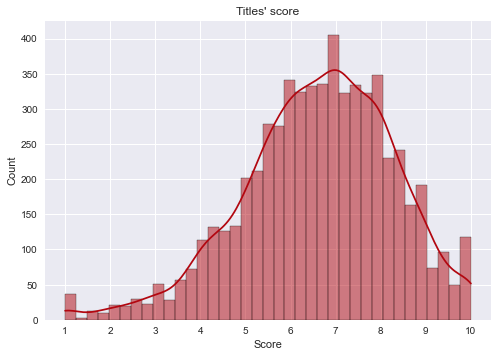

In [46]:
fig, ax = plt.subplots()
sns.histplot(movie_scores['mean'], kde=True, color=palette['secondary'], ax=ax)

ax.set_title('Titles\' score')
ax.set_xlabel('Score')
ax.set_xticks(range(1, 11))

if savefigs:
    fig.savefig('../images/svg/score_distribution.svg', format="svg")
    fig.savefig('../images/png/score_distribution.png', format="png", dpi=150, bbox_inches="tight")

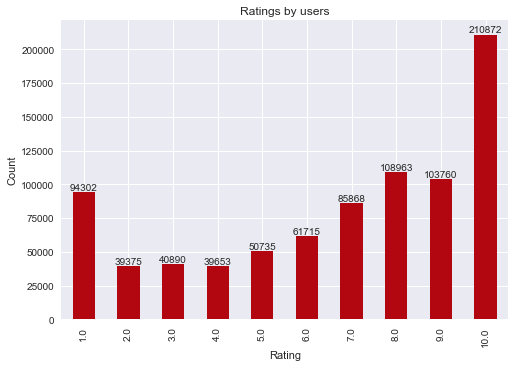

In [47]:
fig, ax = plt.subplots()
reviews.groupby('rating')['movie'].count().plot(kind='bar', color=palette['secondary'], ax=ax)

ax.set_title('Ratings by users')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

for container in ax.containers:
    ax.bar_label(container)

if savefigs:
    fig.savefig('../images/svg/rating_distribution.svg', format="svg")
    fig.savefig('../images/png/rating_distribution.png', format="png", dpi=150, bbox_inches="tight")

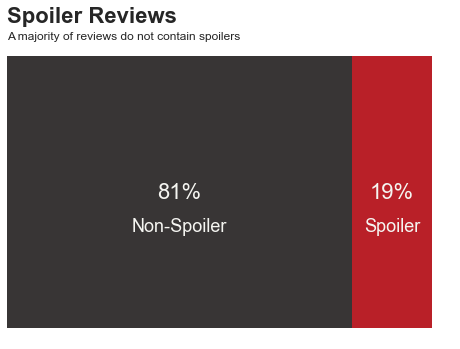

In [48]:
spoiler = reviews['spoiler_tag'].sum() / reviews['spoiler_tag'].count()
non_spoiler = 1 - spoiler

fig, ax = plt.subplots()
ax.barh(0, non_spoiler, alpha=0.9)
ax.barh(0, spoiler, left=non_spoiler, alpha=0.9)

# Title & Subtitle
ax.text(0, 0.5,'Spoiler Reviews', fontsize=22, fontweight='bold')
ax.text(0, 0.45,'A majority of reviews do not contain spoilers', fontsize=12)

ax.text(non_spoiler / 2, 0, f'{non_spoiler * 100:.0f}%', color=palette['tertiary'], va='center', ha='center', fontsize=22)
ax.text(non_spoiler / 2, -0.1, 'Non-Spoiler', color=palette['tertiary'], va='center', ha='center', fontsize=18)
ax.text(non_spoiler + spoiler / 2, 0, f'{spoiler * 100:.0f}%', color=palette['tertiary'], va='center', ha='center', fontsize=22)
ax.text(non_spoiler + spoiler / 2, -0.1, 'Spoiler', color=palette['tertiary'], va='center', ha='center', fontsize=18)

ax.axis('off')

if savefigs:
    fig.savefig('../images/svg/spoiler_percentage.svg', format="svg")
    fig.savefig('../images/png/spoiler_percentage.png', format="png", dpi=150, bbox_inches="tight")

In [49]:
#reviews['review_detail_word_count'] = reviews.loc[:, 'review_detail'].str.count('\w+')
reviews['review_detail_word_count'] = reviews.loc[:, 'review_detail'].apply(lambda s: len(pattern.findall(s)))


In [50]:
reviews['review_detail_word_count'].describe()

count    909452.000000
mean        176.502166
std         181.230737
min           0.000000
25%          54.000000
50%         127.000000
75%         223.000000
max        2770.000000
Name: review_detail_word_count, dtype: float64

In [51]:
reviews[reviews['review_detail_word_count'] == 0]

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,show_id,total,helpful,unhelpful,review_detail_word_count
review_id,,,,,,,,,,,,
5746190,cora_browne,Django Unchained,10.0,Wow,17 May 2020,0,1010101101010101001101001010101010101001010101...,393,7,0,7,0
6450730,paulselly,Olympus Has Fallen,6.0,06/01/2021 - Who need North Koreans? :-) :-),7 January 2021,0,:-) :-) .-) :-) :-) :-) .-) :-) :-) :-) .-) :-...,3870,2,2,0,0
5759855,charliedemento,Pulp Fiction,10.0,:),22 May 2020,1,:) :):) :):) :):) :):) :):) :):) :):) :):) :):...,7803,0,0,0,0
5967746,geekydevjoe,The Wrong Missy,8.0,👍🏻,5 August 2020,0,👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻,2541,3,2,1,0
5970469,lgracedoran,The Umbrella Academy,9.0,Really good,6 August 2020,0,👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍 👍👍👍👍👍👍👍👍...,2191,7,1,6,0
5933739,karenp-30334,The Kissing Booth 2,1.0,.,25 July 2020,1,... .. ... .. ... .... ..... ..... .... ..... ...,2214,7,2,5,0
6238293,bishoashraf,Paranormal,10.0,Fantastic 👏 👏,5 November 2020,1,😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮,1738,5,1,4,0
6243820,missing-27395,Paranormal,10.0,<3,7 November 2020,1,<3 <3\n<3\n<3\n<3<3 <3\n<3\n<3\n<3<3 <3\n<3\n<...,1738,3,0,3,0
6311897,yasha-62261,Mosul,10.0,💪💪💪💪💪💪💪,26 November 2020,0,👌👌👌👌💪💪💪💪👌👌👌👌💪💪💪💪💪💪💪👌👌👌👌👌👌👌👌💪💪💪💪💪💪💪💪👌👌👌👌👌👌👌,1647,1,0,1,0


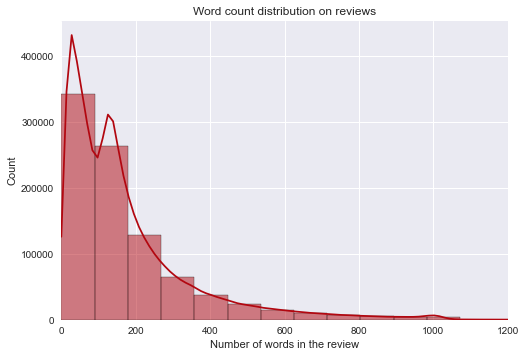

In [52]:
fig, ax = plt.subplots()
sns.histplot(reviews['review_detail_word_count'], kde=True, color=palette['secondary'], ax=ax, bins='doane')

ax.set_title('Word count distribution on reviews')
ax.set_xlim(0, 1200)
ax.set_xlabel('Number of words in the review')
ax.set_xlabel('Number of words in the review')
ax.set_ylabel('Count')

if savefigs:
    fig.savefig('../images/svg/word_count_distribution.svg', format="svg")
    fig.savefig('../images/png/word_count_distribution.png', format="png", dpi=150, bbox_inches="tight")

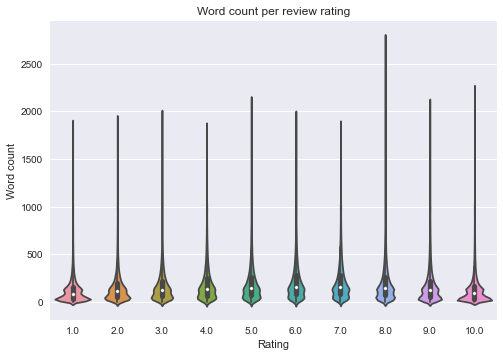

In [53]:
fig, ax = plt.subplots()

sns.violinplot(x='rating', y='review_detail_word_count', data=reviews, kind="violin", ax=ax)
ax.set_title('Word count per review rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Word count')

if savefigs:
    fig.savefig('../images/svg/word_count_violinplot.svg', format="svg")
    fig.savefig('../images/png/word_count_violinplot.png', format="png", dpi=150, bbox_inches="tight")

# Number of reviews per reviewer

In [54]:
reviews_per_reviewer = reviews.groupby('reviewer').count()['movie']
reviews_per_reviewer.describe()

count    478951.000000
mean          1.898841
std           8.166095
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1588.000000
Name: movie, dtype: float64

In [55]:
reviews_per_reviewer[reviews_per_reviewer == reviews_per_reviewer.max()]

reviewer
SnoopyStyle    1588
Name: movie, dtype: int64

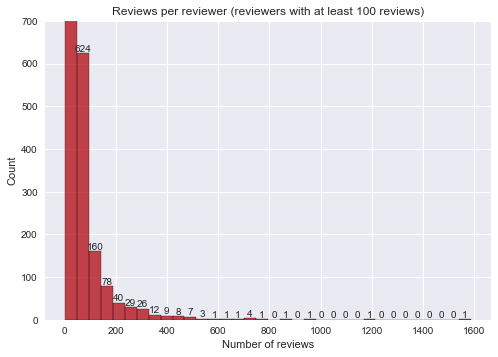

In [56]:
fig, ax = plt.subplots()

sns.histplot(reviews_per_reviewer, bins="doane", ax=ax, color=palette['secondary'])
ax.set_title('Reviews per reviewer (reviewers with at least 100 reviews)')
ax.set_xlabel('Number of reviews')
ax.set_ylim(0, 700)

for container in ax.containers:
    ax.bar_label(container)

if savefigs:
    fig.savefig('../images/svg/reviews_distribution.svg', format="svg")
    fig.savefig('../images/png/reviews_distribution.png', format="png", dpi=150, bbox_inches="tight")